<a href="https://colab.research.google.com/github/Loomer/2022-itc303-team08/blob/ml-lachlan/Loading_Data_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -b ml-manu https://github.com/Loomer/2022-itc303-team08

fatal: destination path '2022-itc303-team08' already exists and is not an empty directory.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
import numpy as np 
import matplotlib.pyplot as pypt 
import cv2
import os 

In [4]:
train_dir = "/content/2022-itc303-team08/images/train"
test_dir = "/content/2022-itc303-team08/images/test"
val_dir = "/content/2022-itc303-team08/images/train"

print("Train set:\n========================================")
num_covid = len(os.listdir(os.path.join(train_dir, 'COVID')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"COVID={num_covid}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
num_covid = len(os.listdir(os.path.join(test_dir, 'COVID')))
num_normal = len(os.listdir(os.path.join(test_dir, 'NORMAL')))
print(f"COVID={num_covid}")
print(f"NORMAL={num_normal}")

print("Validation set:\n========================================")
num_covid = len(os.listdir(os.path.join(val_dir, 'COVID')))
num_normal = len(os.listdir(os.path.join(val_dir, 'NORMAL')))
print(f"COVID={num_covid}")
print(f"NORMAL={num_normal}")


Train set:
COVID=495
NORMAL=501
Test set:
COVID=103
NORMAL=100
Validation set:
COVID=495
NORMAL=501


994


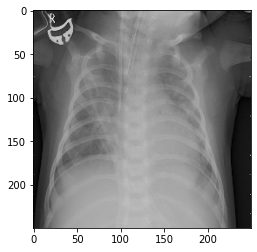

In [5]:
image_set = "/content/2022-itc303-team08/images/train"
imageType = ["COVID", "NORMAL"]
train_set = []
train_labels = []

def create_train_data():
  for imgType in imageType: 

    link = os.path.join(image_set, imgType)  
    
        
    for img in os.listdir(link): 
      if img == "Thumbs.db":
        continue 
      img_array = cv2.imread(os.path.join(link, img))  
      new_img_array = cv2.resize(img_array, (250, 250))  
      train_set.append(new_img_array)
      train_labels.append(imageType.index(imgType)) 

create_train_data()
print(len(train_set))
pypt.imshow(train_set[0])

In [6]:
train_set = np.array(train_set)
train_labels = np.array(train_labels)
train_set = train_set/255.0

In [7]:
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(250, 250, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)])
  
  
  model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [8]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 476288)            0         
                                                                 
 dropout (Dropout)           (None, 476288)            0

198
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


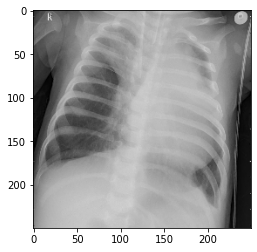

In [9]:
image_set = "/content/2022-itc303-team08/images/val"
imageType = ["COVID", "NORMAL"]
validation_set = []
validation_labels = []

def create_validation_data():
  for imgType in imageType: 

    link = os.path.join(image_set, imgType)  
        
    for img in os.listdir(link): 
      if img == "Thumbs.db":
        continue 
      test_img_array = cv2.imread(os.path.join(link, img))  
      new_test_array = cv2.resize(test_img_array, (250, 250)) 
      validation_set.append(new_test_array)
      validation_labels.append(imageType.index(imgType)) 

create_validation_data()
print(len(validation_set))
print(validation_labels)
pypt.imshow(validation_set[0])

In [10]:
validation_set = np.array(validation_set)
validation_labels = np.array(validation_labels)
validation_set = validation_set/255.0

model.evaluate(validation_set, validation_labels)

7/7 [==============================] - 13s 2s/step - loss: 0.7007 - accuracy: 0.4949


[0.7006673216819763, 0.49494948983192444]

In [11]:
checkpoint_path = "2022-itc303-team08/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose =1, period = 5)

new_model = create_model()

new_model.fit(train_set, train_labels, epochs=10, validation_data = (validation_set, validation_labels), callbacks = [cp_callback])

Epoch 1/10
32/32 [==============================] - 305s 9s/step - loss: 4.0136 - accuracy: 0.7565 - val_loss: 0.7054 - val_accuracy: 0.7576
Epoch 2/10
32/32 [==============================] - 299s 9s/step - loss: 0.2367 - accuracy: 0.9044 - val_loss: 0.2815 - val_accuracy: 0.8838
Epoch 3/10
32/32 [==============================] - 295s 9s/step - loss: 0.1205 - accuracy: 0.9577 - val_loss: 0.3128 - val_accuracy: 0.9091
Epoch 4/10
32/32 [==============================] - 297s 9s/step - loss: 0.0477 - accuracy: 0.9879 - val_loss: 0.2962 - val_accuracy: 0.9192
Epoch 5/10
32/32 [==============================] - ETA: 0s - loss: 0.0162 - accuracy: 0.9990
Epoch 5: saving model to 2022-itc303-team08/cp.ckpt
32/32 [==============================] - 307s 10s/step - loss: 0.0162 - accuracy: 0.9990 - val_loss: 0.3733 - val_accuracy: 0.9192
Epoch 6/10
32/32 [==============================] - 300s 9s/step - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.3989 - val_accuracy: 0.9141
Epoch 7/10
32/32 [

In [12]:
model.load_weights(checkpoint_path)
loss, acc = model.evaluate(validation_set, validation_labels)
print(loss, acc)

7/7 [==============================] - 15s 2s/step - loss: 0.5332 - accuracy: 0.8990
0.5331920385360718 0.8989899158477783


In [15]:
from keras.preprocessing import image

test_dict = {}

truepos = 0
trueneg = 0
falsepos = 0
falseneg = 0

dir = "/content/2022-itc303-team08/images/test/COVID"
for path in os.listdir(dir):
  full_path = os.path.join(dir, path)
  if os.path.isfile(full_path):
    test_dict[full_path] = 1

dir = "/content/2022-itc303-team08/images/test/NORMAL"
for path in os.listdir(dir):
  full_path = os.path.join(dir, path)
  if os.path.isfile(full_path):
    test_dict[full_path] = 0

for path in test_dict.keys():
  img = image.load_img(path, target_size=(250, 250))
  test_image = image.img_to_array(img)
  test_image = np.expand_dims(test_image, axis = 0)

  images = np.vstack([test_image])
  prediction = model.predict(images)

  predictclass = str(prediction)[2]
  actualclass = str(test_dict.get(path))

  if predictclass == "0" and actualclass == "0":
    trueneg += 1
  elif predictclass == "1" and actualclass == "1":
    truepos += 1
  elif predictclass == "1" and actualclass == "0":
    falsepos += 1
    print("FALSE POSITIVE")
  elif predictclass == "0" and actualclass == "1":
    falseneg += 1
    print("FALSE NEGATIVE")

  print(path.replace("/content/2022-itc303-team08/images/test/", "") + "\nActual class: " + actualclass
   + "  Predicted class: " + predictclass + " " + imageType[np.argmax(prediction[0])] + "\n")

  print("\nTrue Positives = " + str(truepos) + "\nTrue Negatives = " + str(trueneg) + "\nFalse Positives = " + str(falsepos) + "\nFalse Negatives = " + str(falseneg))

COVID/person266_bacteria_1237.jpeg
Actual class: 1  Predicted class: 1 COVID


True Positives = 1
True Negatives = 0
False Positives = 0
False Negatives = 0
COVID/person290_virus_594.jpeg
Actual class: 1  Predicted class: 1 COVID


True Positives = 2
True Negatives = 0
False Positives = 0
False Negatives = 0
FALSE NEGATIVE
COVID/person287_virus_586.jpeg
Actual class: 1  Predicted class: 0 NORMAL


True Positives = 2
True Negatives = 0
False Positives = 0
False Negatives = 1
COVID/person277_bacteria_1300.jpeg
Actual class: 1  Predicted class: 1 COVID


True Positives = 3
True Negatives = 0
False Positives = 0
False Negatives = 1
COVID/person267_virus_552.jpeg
Actual class: 1  Predicted class: 1 COVID


True Positives = 4
True Negatives = 0
False Positives = 0
False Negatives = 1
COVID/person281_bacteria_1327.jpeg
Actual class: 1  Predicted class: 1 COVID


True Positives = 5
True Negatives = 0
False Positives = 0
False Negatives = 1
COVID/person281_bacteria_1323.jpeg
Actual class: 1  Pr